In [ ]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import dijkstra
from sklearn.decomposition import PCA

from utils import *

# Years of the 20th century

In [3]:
# read in representations and labels

X = pd.read_csv("representations/years_reprs.csv", index_col=None, header=None)
labels = pd.read_csv("representations/years_labels.csv", index_col=None, header=None)
labels = np.array(labels).flatten()

In [4]:
# normalise representations to have norm one

# remove rows with (close to) zero norm
EPS = 1e-3
norms = np.linalg.norm(X, axis=1)
mask = norms > EPS
X = X[mask]
norms = norms[mask]

Xn = X / norms[:, np.newaxis]
labels = labels[mask]

#### PCA of representations

In [5]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(Xn)

interactive_3d_plot(
    Xp,
    labels=labels,
    color_values=labels-1900,
    point_size=2
)

#### Cosine similarity and geodesic distance

In [6]:
# compute the nearest neighbour graph

k = 10
A = knn_graph(Xn, k)
_ = largest_connected_component(A, verbose=True)

Size of graph: 2132
Number of connected components: 1
Size of largest connected component: 2132


In [ ]:
# compute pairwise shortest path distances on estimates manifold
DXm = dijkstra(A, return_predecessors=False)

# compute pairwise cosine similarities
DXc = 1 - squareform(pdist(Xn, metric="cosine"))

# compute pairwise distances between years
D = squareform(pdist(labels[:, np.newaxis], metric="euclidean"))

# compute pairwise distances between log(2019 - years)
transformed_years = np.log(2019 - labels)
Dt = squareform(pdist(transformed_years[:, np.newaxis], metric="euclidean"))


Evidence *against* isometry with respect to the usual distance between years.

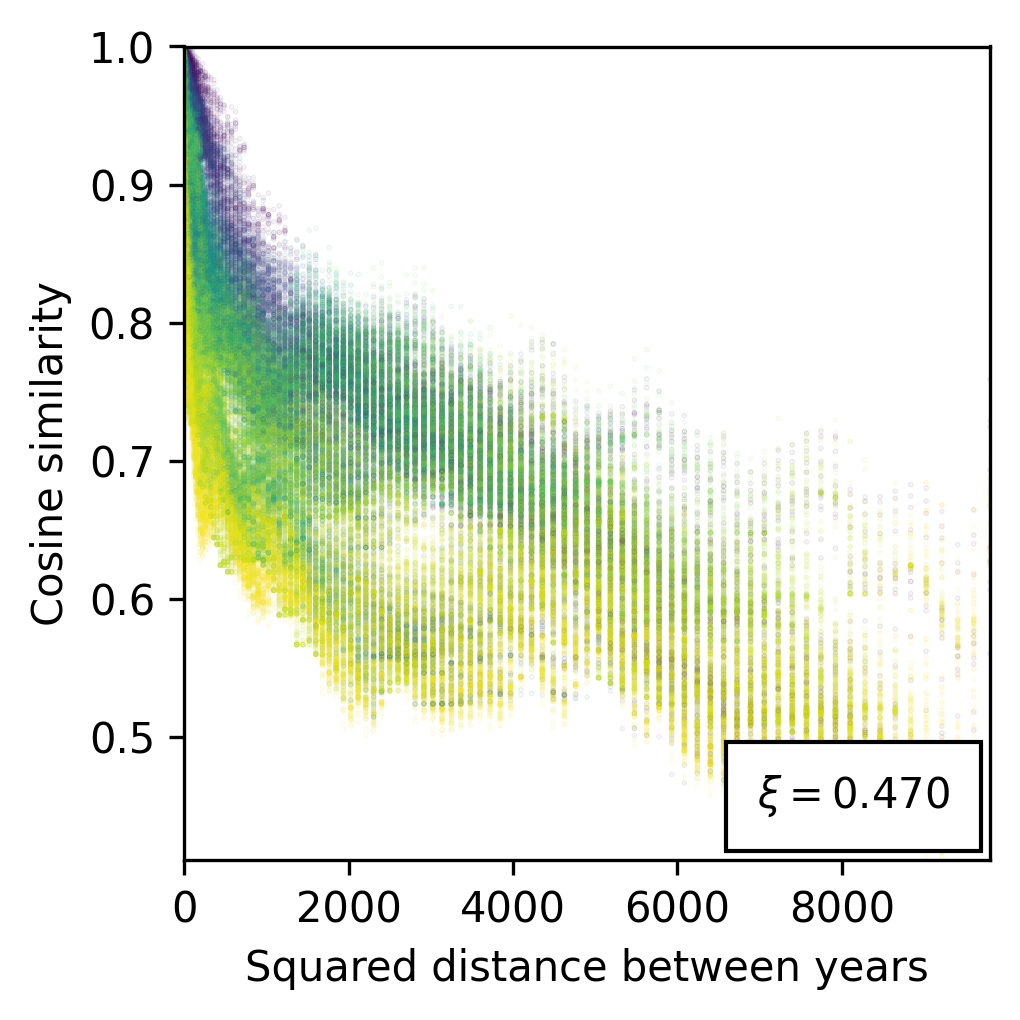

In [8]:
fig, ax = distance_plot(
    DXc, D, labels, cmap =plt.cm.viridis, corr_coef="chatterjee",
    square_distances=True, xlabel="Squared distance between years",
    ylabel="Cosine similarity",
)

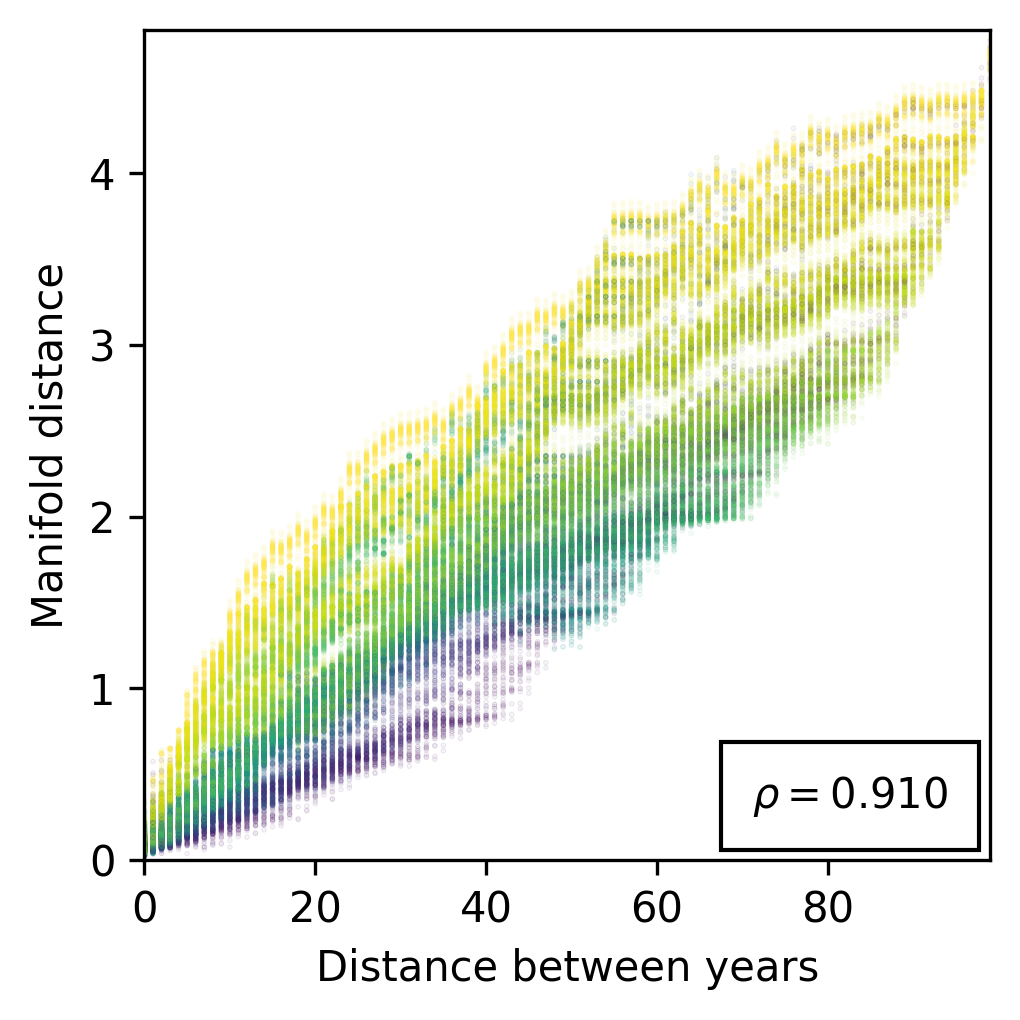

In [9]:
fig, ax = distance_plot(
    DXm, D, labels, cmap =plt.cm.viridis, corr_coef="pearson",
    square_distances=False, xlabel="Distance between years",
    ylabel="Manifold distance",
)

Evidence *for* isometry when encoding distances as $\log(2019 - \text{year})$.

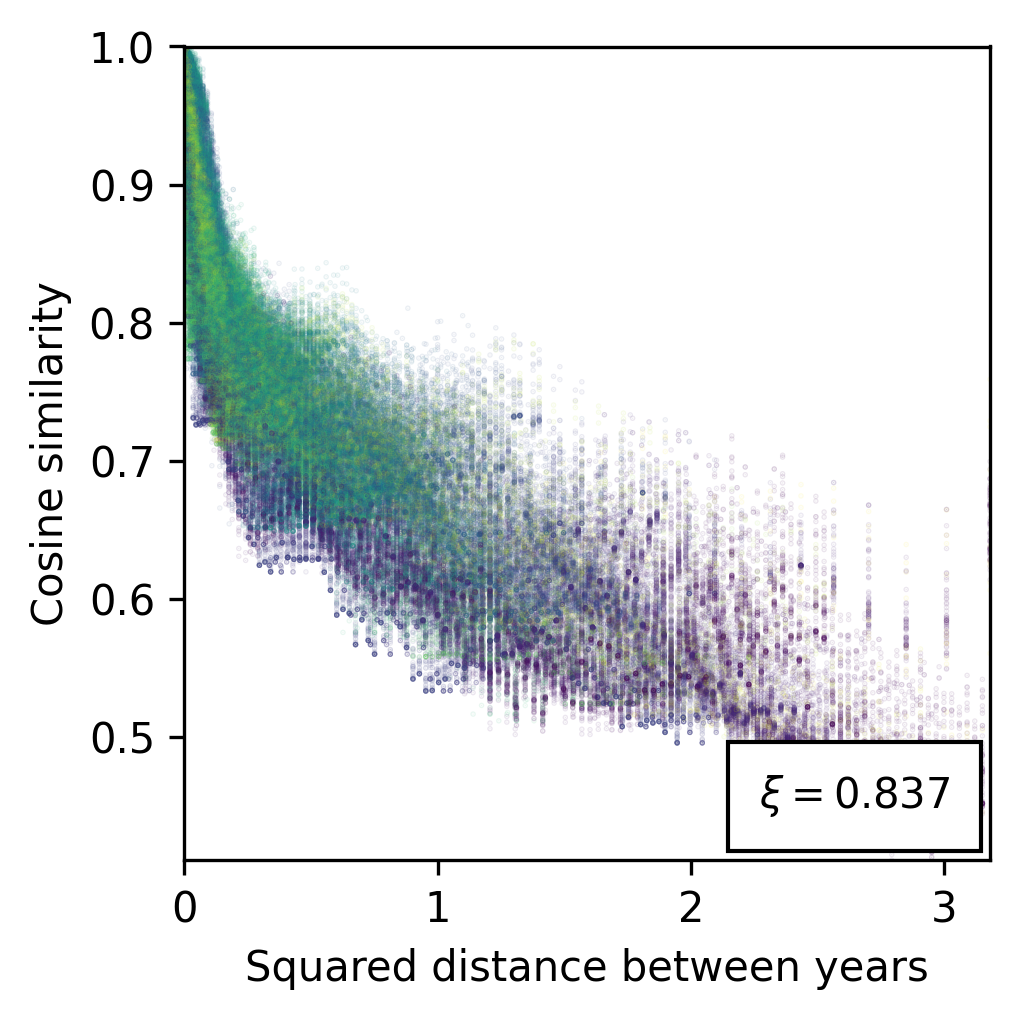

In [10]:
fig, ax = distance_plot(
    DXc, Dt, transformed_years, cmap =plt.cm.viridis, corr_coef="chatterjee",
    square_distances=True, xlabel="Squared distance between years",
    ylabel="Cosine similarity",
)

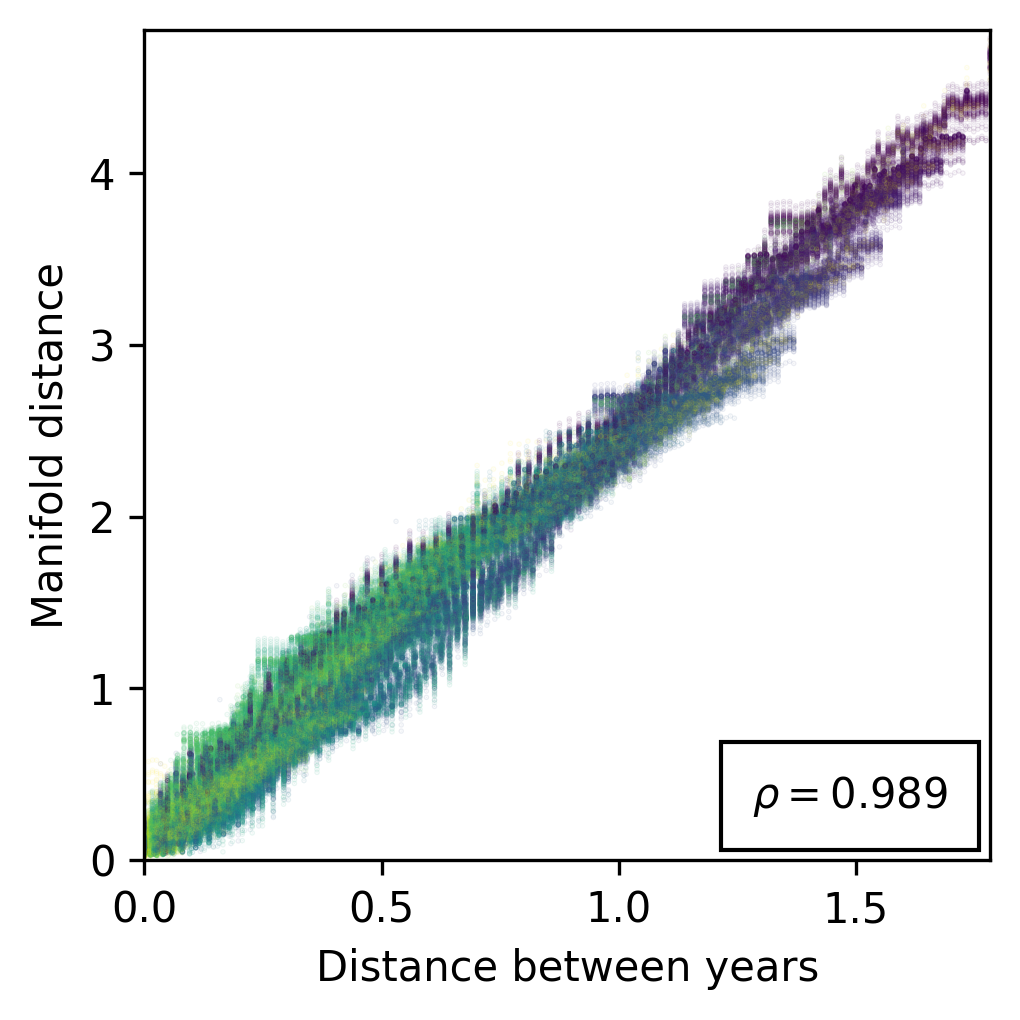

In [11]:
fig, ax = distance_plot(
    DXm, Dt, transformed_years, cmap =plt.cm.viridis, corr_coef="pearson",
    square_distances=False, xlabel="Distance between years",
    ylabel="Manifold distance",
)

# Months of the year

In [28]:
# read in representations and labels

X = pd.read_csv("representations/months_reprs.csv", index_col=None, header=None)
labels = pd.read_csv("representations/months_labels.csv", index_col=None, header=None)
labels = np.array(labels).flatten()

In [29]:
# normalise representations to have norm one

# remove rows with (close to) zero norm
EPS = 1e-3
norms = np.linalg.norm(X, axis=1)
mask = norms > EPS
X = X[mask]
norms = norms[mask]

Xn = X / norms[:, np.newaxis]
labels = labels[mask]

In [30]:
months_of_year = {
    "january": 0,
    "february": 1,
    "march": 2,
    "april": 3,
    "may": 4,
    "june": 5,
    "july": 6,
    "august": 7,
    "september": 8,
    "october": 9,
    "november": 10,
    "december": 11,
}

labels_idx = [months_of_year[m] for m in labels]
labels_idx = np.array(labels_idx)

In [32]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(Xn)

interactive_3d_plot(
    Xp,
    labels=labels,
    color_values=labels_idx,
    colormap="HSV",
    point_size=4
)

# Days of the week

In [33]:
# read in representations and labels

X = pd.read_csv("representations/days_reprs.csv", index_col=None, header=None)
labels = pd.read_csv("representations/days_labels.csv", index_col=None, header=None)
labels = np.array(labels).flatten()

In [ ]:
# normalise representations to have norm one

# remove rows with (close to) zero norm
EPS = 1e-3
norms = np.linalg.norm(X, axis=1)
mask = norms > EPS
X = X[mask]
norms = norms[mask]

Xn = X / norms[:, np.newaxis]
labels = labels[mask]

In [35]:
days_of_week = {
    "monday": 0,
    "mondays": 0,
    "tuesday": 1,
    "tuesdays": 1,
    "wednesday": 2,
    "wednesdays": 2,
    "thursday": 3,
    "thursdays": 3,
    "friday": 4,
    "fridays": 4,
    "saturday": 5,
    "saturdays": 5,
    "sunday": 6,
    "sundays": 6,
}

labels_idx = [days_of_week[m] for m in labels]
labels_idx = np.array(labels_idx)

In [36]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(Xn)

interactive_3d_plot(
    Xp,
    labels=labels,
    color_values=labels_idx,
    colormap='HSV',
    point_size=4
)

# English names for colours

In [82]:
# get colour names and hex codes from XKCD survey
f = "https://xkcd.com/color/rgb.txt"
df = pd.read_csv(f, skiprows=1, delimiter="\t", names=["name", "hex"], index_col=0, usecols=[0,1])
colors = np.array(df.index)
hex = np.array(df.hex)

In [83]:
hls_vals = hex_to_hls(df['hex'])
hue = hls_vals[:,0]
lightness = hls_vals[:,1]
saturation = hls_vals[:,2]

In [ ]:
# read in the embeddings (already normalised)
X = pd.read_csv("representations/colours_reprs.csv", index_col=None, header=None)

In [85]:
filter_words = [
    'neon', 'easter', 'iris', 'aqua', 'ugly', 'barf', 'grapefruit', 'apple', 'pear', 'melon', 'pea',
    'dirty', 'puke', 'vomit', 'barf', 'shit', 'poop', 'booger', 'snot', 'strawberry', 'topaz', 
    'sapphire', 'jade', 'poo', 'barney', 'cornflower', 'berry', 'coral', 'heliotrope', 'adobe',
    'hazel', 'merlot', 'bordeaux', 'wine', 'cheese', 'diarrhea', 'petrol', 'spruce', 'hot',
    'electric', 'royal', 'velvet'
]

# filter out low saturation, high lightness and colours which do not obviously refer to a colour.
masks = []
masks.append(
    np.full(len(colors), True)
)
masks.append(
    (saturation >= 0.4)
)
masks.append(
    (lightness <= 0.8)
)
for word in filter_words:
    masks.append(
        np.array([word not in c for c in colors])
    )
mask = np.logical_and.reduce(masks)


In [86]:
X = X[mask]
colors = colors[mask]
hex = hex[mask]
hue = hue[mask]
saturation = saturation[mask]
lightness = lightness[mask]

In [92]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(X)

interactive_3d_plot(
    Xp,
    labels=colors,
    color_values=hex,
    point_size=2.5
)

In [93]:
# project onto the first four uncentered principal components
from scipy.sparse.linalg import svds

d=4
u, s, vt = svds(X.values, k=d)
u = u[:, ::-1]
s = s[::-1]
vt = vt[::-1]
Xl = u * s

# normalise to unit length
Xl = Xl / np.linalg.norm(Xl, axis=1)[:,np.newaxis]

In [112]:
# tune k, code assumes graph is connected here
k = 5
A = knn_graph(Xl, k)

# set very short edges to have a minimum length (for numerical stability)
A.data[A.data < 1e-3] = 1e-3
A.eliminate_zeros()

_ = largest_connected_component(A, verbose=True)

Size of graph: 606
Number of connected components: 1
Size of largest connected component: 606


In [113]:
# compute pairwise shortest path distances on estimates manifold
DXm = dijkstra(A, return_predecessors=False)

# compute pairwise cosine similarities
DXc = 1 - squareform(pdist(Xl, metric="cosine"))

# compute pairwise distances between hues
D = np.subtract.outer(hue,hue)
D = ((D + (1/2)) % 1) - (1/2)
D = np.abs(D)

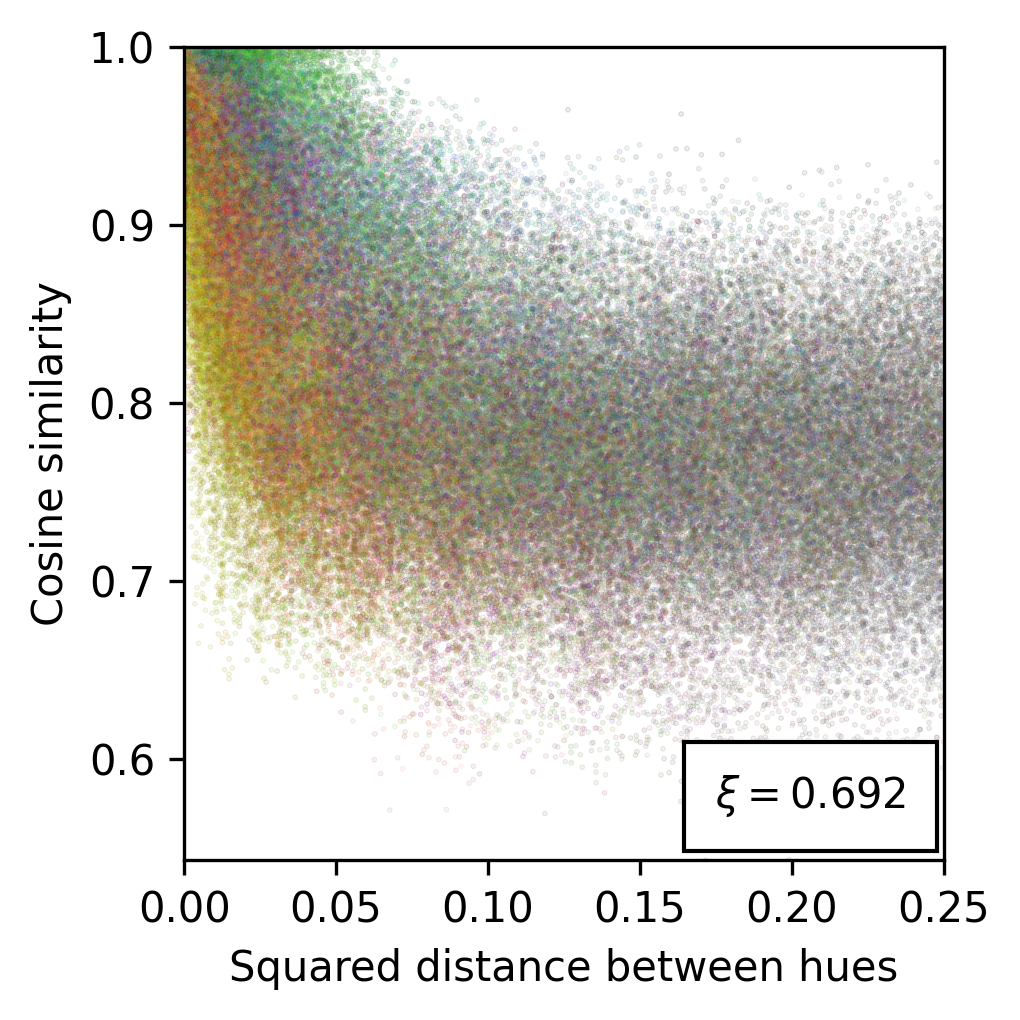

In [114]:
fig, ax = distance_plot(
    DXc, D, colors, colors=hex, corr_coef="chatterjee",
    square_distances=True, xlabel="Squared distance between hues",
    ylabel="Cosine similarity",
)

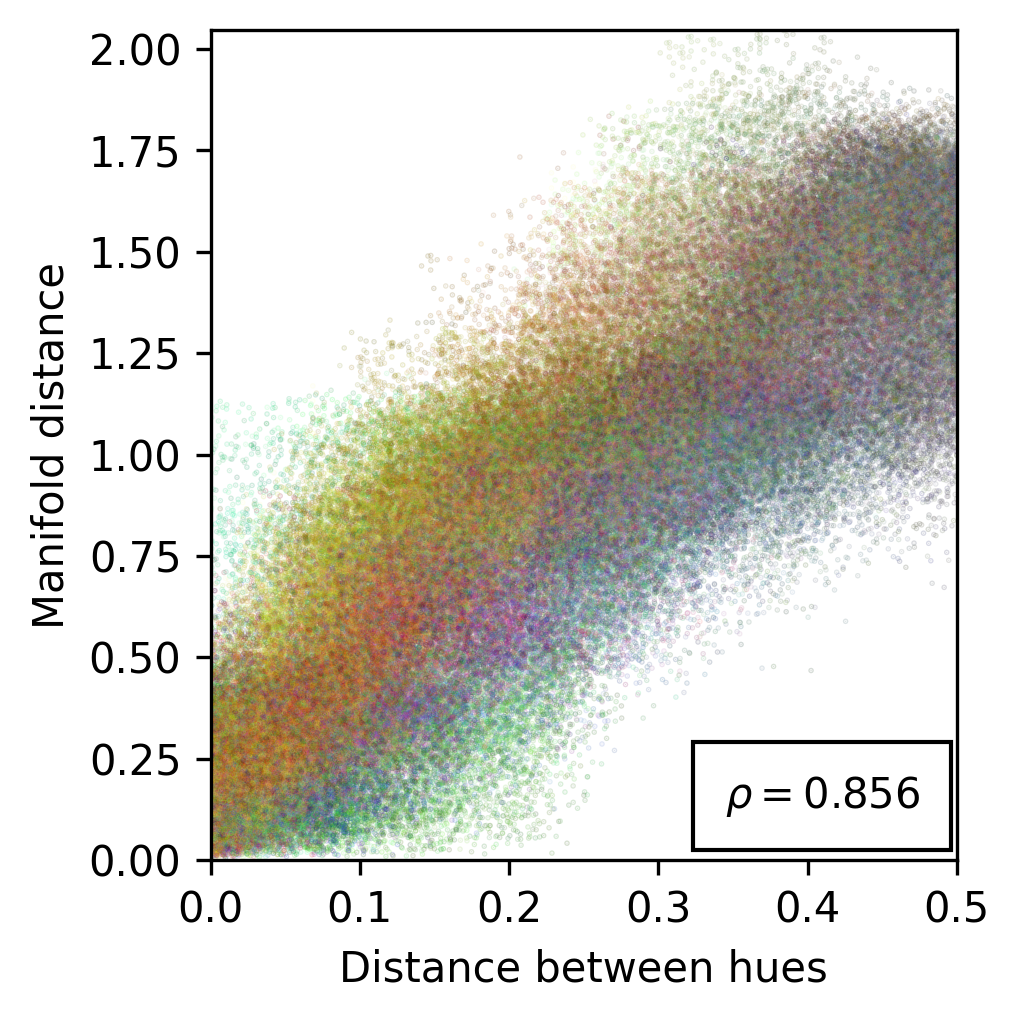

In [115]:
fig, ax = distance_plot(
    DXm, D, colors, colors=hex, corr_coef="pearson",
    square_distances=False, xlabel="Distance between hues",
    ylabel="Manifold distance",
)

# Dates of the year

In [124]:
# read in representations and labels

X = pd.read_csv("representations/dates_reprs.csv", index_col=None, header=None)
labels = pd.read_csv("representations/dates_labels.csv", index_col=None, header=None)
labels = np.array(labels).flatten()
labels_idx = np.array(list(range(len(labels))))

In [125]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(X)

interactive_3d_plot(
    Xp,
    labels=labels,
    color_values=labels_idx,
    colormap='Twilight',
    point_size=2.5
)

In [122]:
# project onto the first four uncentered principal components
from scipy.sparse.linalg import svds

d=4
u, s, vt = svds(X.values, k=d)
u = u[:, ::-1]
s = s[::-1]
vt = vt[::-1]
Xl = u * s

# normalise to unit length
Xl = Xl / np.linalg.norm(Xl, axis=1)[:,np.newaxis]

In [123]:
# remove some points which cause the graph to shortcircuit
excluded_dates = ["9th March", "5th November", "20th November", "1st November", "3rd November", "9th February"]
mask = np.array([date not in excluded_dates for date in labels])

In [126]:
Xl = Xl[mask]
labels = labels[mask]
labels_idx = labels_idx[mask]

In [127]:
k = 28
A = knn_graph(Xl, k, directed=False)
_ = largest_connected_component(A, verbose=True)

Size of graph: 358
Number of connected components: 1
Size of largest connected component: 358


In [128]:
# compute pairwise shortest path distances on estimates manifold
DXm = dijkstra(A, return_predecessors=False)

# compute pairwise cosine similarities
DXc = 1 - squareform(pdist(Xl, metric="cosine"))

# compute pairwise distances between hues
D = np.subtract.outer(labels_idx,labels_idx)
D = ((D + (365/2)) % 365) - (365/2)
D = np.abs(D)

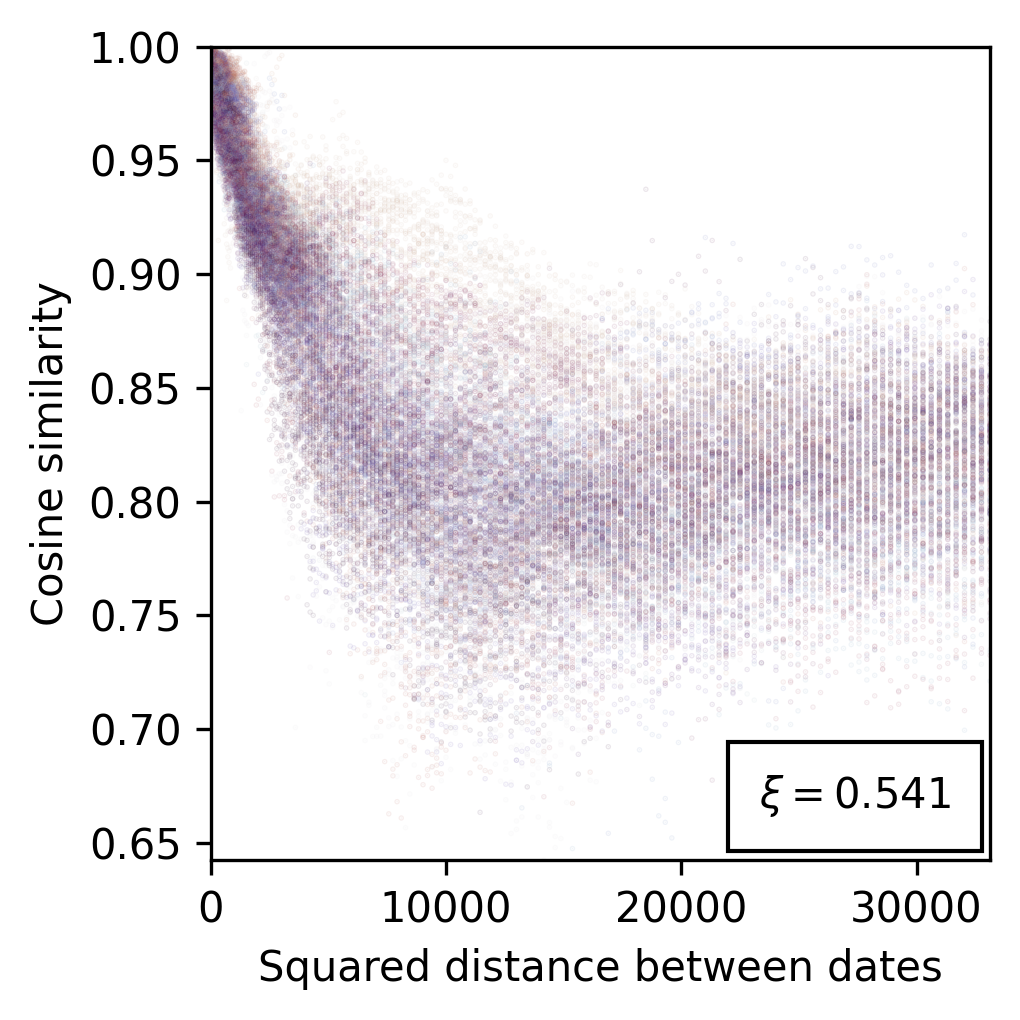

In [138]:
fig, ax = distance_plot(
    DXc, D, labels_idx, cmap=plt.cm.twilight, corr_coef="chatterjee",
    square_distances=True, xlabel="Squared distance between dates",
    ylabel="Cosine similarity",
)

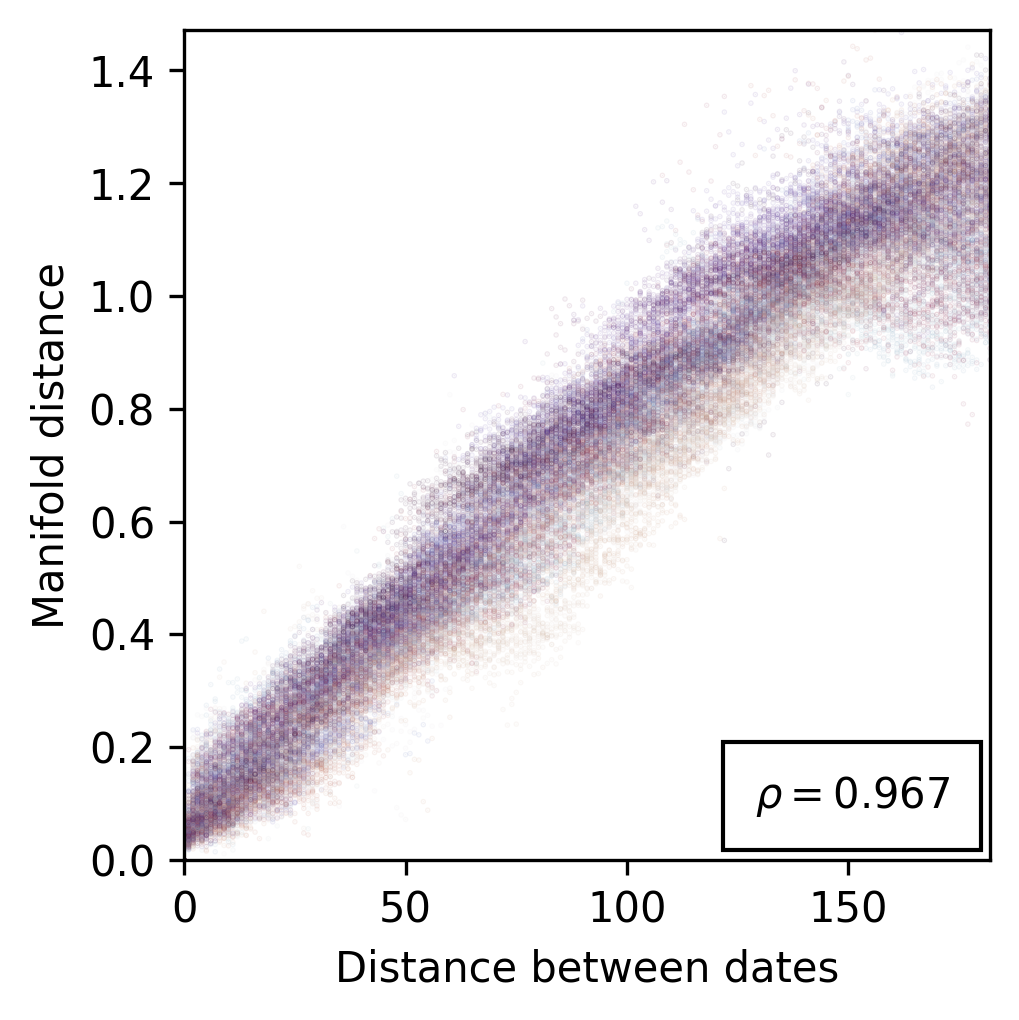

In [140]:
fig, ax = distance_plot(
    DXm, D, labels_idx, cmap=plt.cm.twilight, corr_coef="pearson",
    square_distances=False, xlabel="Distance between dates",
    ylabel="Manifold distance",
)